# Processamento de Linguagem Natural - Análise de sentimento
Procedimento de Análise de Sentimento para identificar opinião a partir de críticas de filmes.
## Importando os dados

In [1]:
import pandas as pd

In [2]:
resenha = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

## Explorando o dataset

In [5]:
print("Negativa\n")
print(resenha.text_pt[189])

Negativa

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [6]:
print("Positiva\n")
print(resenha.text_pt[49002])

Positiva

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior

In [7]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [8]:
resenha['classificacao'] = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[49459 rows x 5 columns]

## Vetorização

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [11]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [12]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [14]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

In [16]:
bag_of_words.shape

(49459, 50)

## Primeiro modelo

In [18]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, resenha.classificacao, random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)
acuracia = regressao_logistica.score(x_test, y_test)
print(acuracia)

0.6583097452486858


In [19]:
def classificar_texto(texto, col_texto, col_class):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[col_texto])

    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, texto[col_class], random_state=42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    return regressao_logistica.score(x_test, y_test)
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


## Visuaalizando o vocabulário

In [20]:
!pip install wordcloud

In [21]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

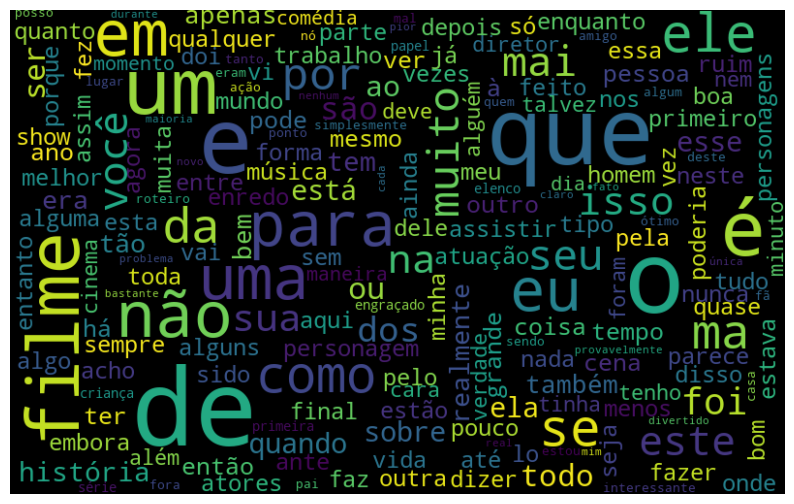

In [22]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
def nuvem_de_palavras(texto, coluna_do_texto, coluna_de_filtro, elemento_de_filtro):
    textos_selecionados = texto.query(f"{coluna_de_filtro} == '{elemento_de_filtro}'")
    todas_palavras = ' '.join([x for x in textos_selecionados[coluna_do_texto]])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

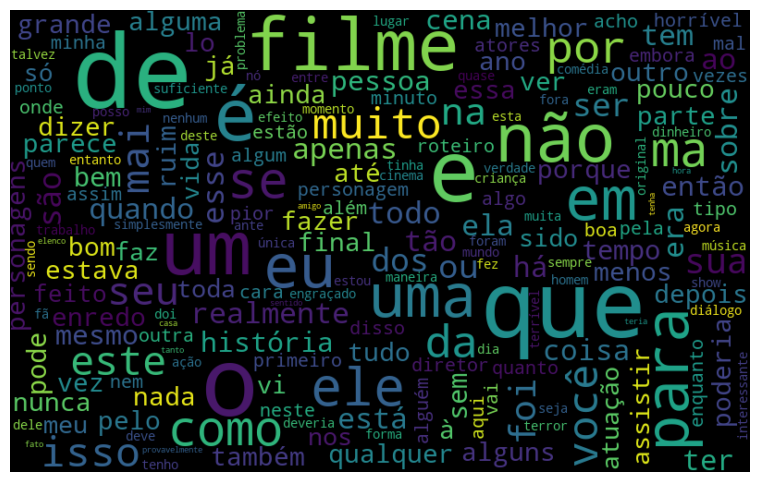

In [24]:
nuvem_de_palavras(resenha, 'text_pt', 'sentiment', 'neg')

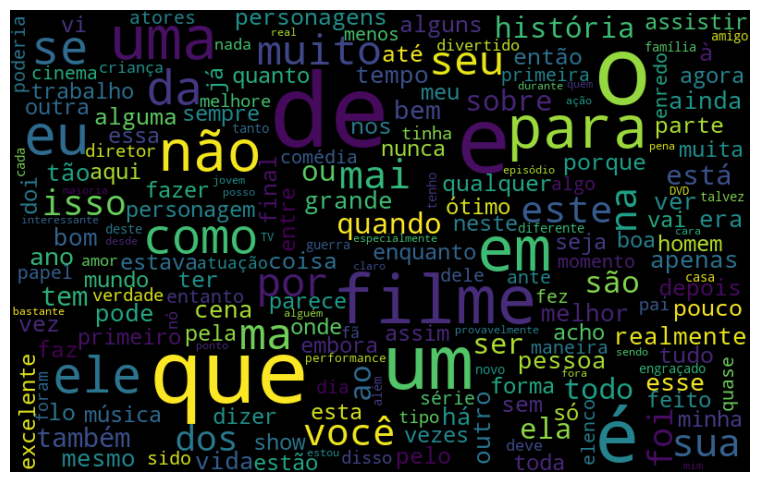

In [25]:
nuvem_de_palavras(resenha, 'text_pt', 'sentiment', 'pos')

In [26]:
resenha[resenha['sentiment'] == 'neg']

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
37113  37115  Towards the end of the movie, I felt it was to...   
37114  37116  This is the kind of movie that my enemies cont...   
37115  37117  I saw Descent last night at the Stockholm Film...   
37116  37118  Some films that you pick up for a pound turn o...   
37117  37119  This is one of the dumbest films, Ive ever see...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
37113  No final do filme, senti que era muito técnico...       neg   
37114  Este é o tipo de filme que meus inimigos me as...       neg   
37115  Eu vi Descent na noite passada no Stockholm Fi...       neg   
37116  Alguns filmes que você escolhe por um quilo sã...       neg   
37117  Este é um dos filmes mais idiotas que já vi. E...       neg   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
37113              0  
37114              0  
37115              0  
37116              0  
37117              0  

[24765 rows x 5 columns]

In [27]:
!pip install --user -U nltk

In [28]:
import nltk

In [29]:
nltk.download('stopwords')
nltk.download('rslp')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guifr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\guifr\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [30]:
frases = ['um filme bom', 'um filme ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [31]:
from nltk import tokenize

In [32]:
frase = 'Bem vindo ao mundo do PLN'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [33]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                             'Frequência': list(frequencia.values())})

In [34]:
df_frequencia.nlargest(columns="Frequência", n=10)

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

In [35]:
import seaborn as sns

In [36]:
def grafico_de_barras(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([x for x in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                 'Frequência': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_frequencia,
                     x='Palavra', y='Frequência', palette='twilight_shifted')
    ax.set(ylabel='Contagem')
    plt.xticks(rotation=80)
    plt.show()


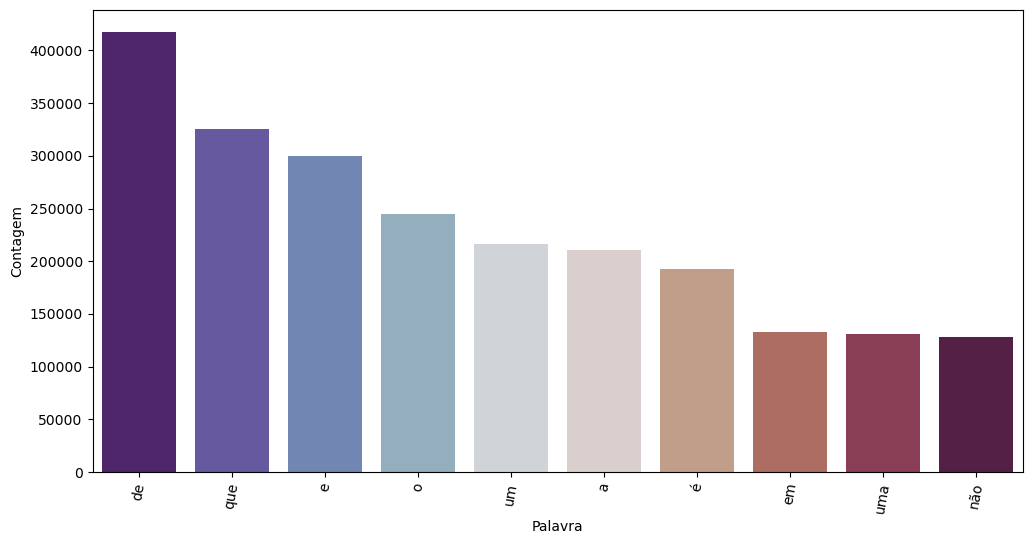

In [37]:
grafico_de_barras(resenha, 'text_pt', 10)

## Tratamento do dataset
### Tratamento 1 - remoção de palavras vazias

In [38]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes = [rf'\b{x}\b' for x in palavras_irrelevantes]
print(palavras_irrelevantes)

['\\ba\\b', '\\bà\\b', '\\bao\\b', '\\baos\\b', '\\baquela\\b', '\\baquelas\\b', '\\baquele\\b', '\\baqueles\\b', '\\baquilo\\b', '\\bas\\b', '\\bàs\\b', '\\baté\\b', '\\bcom\\b', '\\bcomo\\b', '\\bda\\b', '\\bdas\\b', '\\bde\\b', '\\bdela\\b', '\\bdelas\\b', '\\bdele\\b', '\\bdeles\\b', '\\bdepois\\b', '\\bdo\\b', '\\bdos\\b', '\\be\\b', '\\bé\\b', '\\bela\\b', '\\belas\\b', '\\bele\\b', '\\beles\\b', '\\bem\\b', '\\bentre\\b', '\\bera\\b', '\\beram\\b', '\\béramos\\b', '\\bessa\\b', '\\bessas\\b', '\\besse\\b', '\\besses\\b', '\\besta\\b', '\\bestá\\b', '\\bestamos\\b', '\\bestão\\b', '\\bestar\\b', '\\bestas\\b', '\\bestava\\b', '\\bestavam\\b', '\\bestávamos\\b', '\\beste\\b', '\\besteja\\b', '\\bestejam\\b', '\\bestejamos\\b', '\\bestes\\b', '\\besteve\\b', '\\bestive\\b', '\\bestivemos\\b', '\\bestiver\\b', '\\bestivera\\b', '\\bestiveram\\b', '\\bestivéramos\\b', '\\bestiverem\\b', '\\bestivermos\\b', '\\bestivesse\\b', '\\bestivessem\\b', '\\bestivéssemos\\b', '\\bestou\\b', '\

In [39]:
palavras_irrelevantes_regex = '(' + '|'.join(palavras_irrelevantes) + ')'
palavras_irrelevantes_regex

'(\\ba\\b|\\bà\\b|\\bao\\b|\\baos\\b|\\baquela\\b|\\baquelas\\b|\\baquele\\b|\\baqueles\\b|\\baquilo\\b|\\bas\\b|\\bàs\\b|\\baté\\b|\\bcom\\b|\\bcomo\\b|\\bda\\b|\\bdas\\b|\\bde\\b|\\bdela\\b|\\bdelas\\b|\\bdele\\b|\\bdeles\\b|\\bdepois\\b|\\bdo\\b|\\bdos\\b|\\be\\b|\\bé\\b|\\bela\\b|\\belas\\b|\\bele\\b|\\beles\\b|\\bem\\b|\\bentre\\b|\\bera\\b|\\beram\\b|\\béramos\\b|\\bessa\\b|\\bessas\\b|\\besse\\b|\\besses\\b|\\besta\\b|\\bestá\\b|\\bestamos\\b|\\bestão\\b|\\bestar\\b|\\bestas\\b|\\bestava\\b|\\bestavam\\b|\\bestávamos\\b|\\beste\\b|\\besteja\\b|\\bestejam\\b|\\bestejamos\\b|\\bestes\\b|\\besteve\\b|\\bestive\\b|\\bestivemos\\b|\\bestiver\\b|\\bestivera\\b|\\bestiveram\\b|\\bestivéramos\\b|\\bestiverem\\b|\\bestivermos\\b|\\bestivesse\\b|\\bestivessem\\b|\\bestivéssemos\\b|\\bestou\\b|\\beu\\b|\\bfoi\\b|\\bfomos\\b|\\bfor\\b|\\bfora\\b|\\bforam\\b|\\bfôramos\\b|\\bforem\\b|\\bformos\\b|\\bfosse\\b|\\bfossem\\b|\\bfôssemos\\b|\\bfui\\b|\\bhá\\b|\\bhaja\\b|\\bhajam\\b|\\bhajamos\\b|

In [40]:
resenha['tratamento_1'] = resenha.text_pt.str.replace(rf'{palavras_irrelevantes_regex}', '', case=False, regex=True)

In [41]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  
0                  0    vez,  Sr. Costner arrumou  filme    tempo   ...  
1                  0     exemplo  motivo    maioria  filmes  ação   ...  
2                  0  Primeiro  tudo  odeio  raps imbecis,   poderia...  
3                  0     Beatles puderam escrever músicas  todos gos...  
4                  0  Filmes  fotos  latão    palavra apropriada  , ...  
...              ...                                                ...  
49454              1    média  votos   baixa,   fato   funcionário  ...  
49455              1   enredo  algumas reviravoltas infelizes  inacr...  
49456              1   espantado   forma   filme   maioria  outros  ...  
49457              1   Christmas Together realmente veio antes   tem...  
49458              1   drama romântico  classe trabalhadora  diretor...  

[49459 rows x 6 columns]

In [42]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6879094217549535

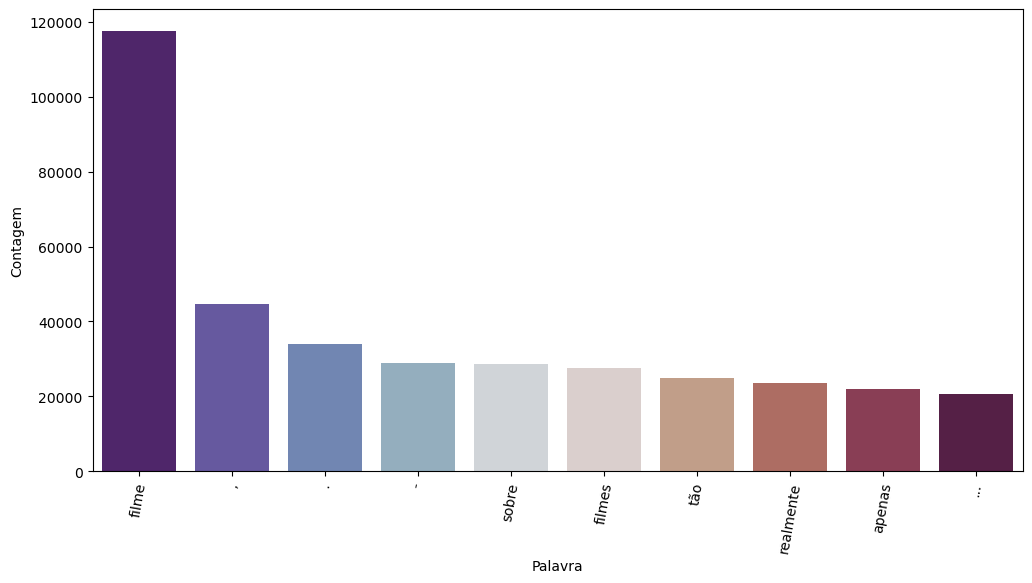

In [43]:
grafico_de_barras(resenha, 'tratamento_1', 10)

### Tratamento 2 - remoção da pontuação

In [44]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [45]:
palavras_irrelevantes

['\\ba\\b',
 '\\bà\\b',
 '\\bao\\b',
 '\\baos\\b',
 '\\baquela\\b',
 '\\baquelas\\b',
 '\\baquele\\b',
 '\\baqueles\\b',
 '\\baquilo\\b',
 '\\bas\\b',
 '\\bàs\\b',
 '\\baté\\b',
 '\\bcom\\b',
 '\\bcomo\\b',
 '\\bda\\b',
 '\\bdas\\b',
 '\\bde\\b',
 '\\bdela\\b',
 '\\bdelas\\b',
 '\\bdele\\b',
 '\\bdeles\\b',
 '\\bdepois\\b',
 '\\bdo\\b',
 '\\bdos\\b',
 '\\be\\b',
 '\\bé\\b',
 '\\bela\\b',
 '\\belas\\b',
 '\\bele\\b',
 '\\beles\\b',
 '\\bem\\b',
 '\\bentre\\b',
 '\\bera\\b',
 '\\beram\\b',
 '\\béramos\\b',
 '\\bessa\\b',
 '\\bessas\\b',
 '\\besse\\b',
 '\\besses\\b',
 '\\besta\\b',
 '\\bestá\\b',
 '\\bestamos\\b',
 '\\bestão\\b',
 '\\bestar\\b',
 '\\bestas\\b',
 '\\bestava\\b',
 '\\bestavam\\b',
 '\\bestávamos\\b',
 '\\beste\\b',
 '\\besteja\\b',
 '\\bestejam\\b',
 '\\bestejamos\\b',
 '\\bestes\\b',
 '\\besteve\\b',
 '\\bestive\\b',
 '\\bestivemos\\b',
 '\\bestiver\\b',
 '\\bestivera\\b',
 '\\bestiveram\\b',
 '\\bestivéramos\\b',
 '\\bestiverem\\b',
 '\\bestivermos\\b',
 '\\bestivesse\\b

In [46]:
pontuacao_stopwords_regex = '(' + '|'.join(palavras_irrelevantes) + '|[^\w\s])'
pontuacao_stopwords_regex

'(\\ba\\b|\\bà\\b|\\bao\\b|\\baos\\b|\\baquela\\b|\\baquelas\\b|\\baquele\\b|\\baqueles\\b|\\baquilo\\b|\\bas\\b|\\bàs\\b|\\baté\\b|\\bcom\\b|\\bcomo\\b|\\bda\\b|\\bdas\\b|\\bde\\b|\\bdela\\b|\\bdelas\\b|\\bdele\\b|\\bdeles\\b|\\bdepois\\b|\\bdo\\b|\\bdos\\b|\\be\\b|\\bé\\b|\\bela\\b|\\belas\\b|\\bele\\b|\\beles\\b|\\bem\\b|\\bentre\\b|\\bera\\b|\\beram\\b|\\béramos\\b|\\bessa\\b|\\bessas\\b|\\besse\\b|\\besses\\b|\\besta\\b|\\bestá\\b|\\bestamos\\b|\\bestão\\b|\\bestar\\b|\\bestas\\b|\\bestava\\b|\\bestavam\\b|\\bestávamos\\b|\\beste\\b|\\besteja\\b|\\bestejam\\b|\\bestejamos\\b|\\bestes\\b|\\besteve\\b|\\bestive\\b|\\bestivemos\\b|\\bestiver\\b|\\bestivera\\b|\\bestiveram\\b|\\bestivéramos\\b|\\bestiverem\\b|\\bestivermos\\b|\\bestivesse\\b|\\bestivessem\\b|\\bestivéssemos\\b|\\bestou\\b|\\beu\\b|\\bfoi\\b|\\bfomos\\b|\\bfor\\b|\\bfora\\b|\\bforam\\b|\\bfôramos\\b|\\bforem\\b|\\bformos\\b|\\bfosse\\b|\\bfossem\\b|\\bfôssemos\\b|\\bfui\\b|\\bhá\\b|\\bhaja\\b|\\bhajam\\b|\\bhajamos\\b|

In [47]:
resenha['tratamento_2'] = resenha.tratamento_1.str.replace(rf'{pontuacao_stopwords_regex}', '', case=False, regex=True)

In [48]:
print(resenha.text_pt[0])
print(resenha.tratamento_1[0])
print(resenha.tratamento_2[0])

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.
  vez,  Sr. Costner a

In [49]:
classificar_texto(resenha, 'tratamento_2', 'classificacao')

0.6870198139911039

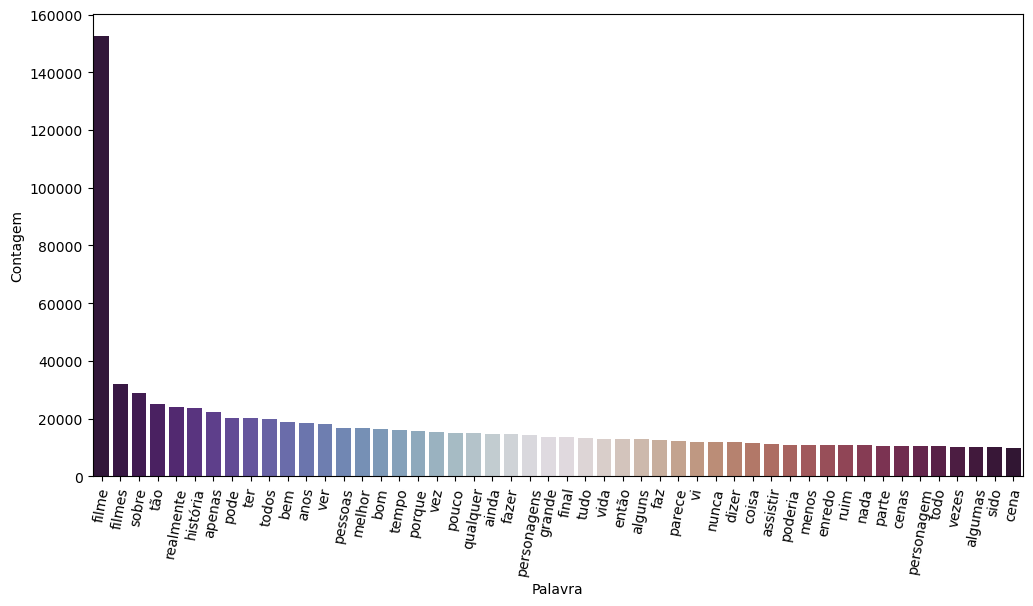

In [50]:
grafico_de_barras(resenha, 'tratamento_2', 50)

### Tratamento 3 - remoção dos acentos

In [51]:
!pip install unidecode

In [52]:
import unidecode

acentos = "Ótimo não maçã é têm"
unidecode.unidecode(acentos)

'Otimo nao maca e tem'

In [53]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha.tratamento_2]

In [54]:
sem_acentos[0]

'  vez  Sr Costner arrumou  filme    tempo    necessario Alem  terriveis sequencias  resgate  mar  quais   poucas  simplesmente   importei  nenhum  personagens  maioria    fantasmas  armario   personagem Costers  realizado logo  inicio   esquecido    tarde     importava  personagem    deveriamos  importar   arrogante  superconfiante Ashton Kutcher  problema    sai   garoto  pensa   melhor   qualquer outra pessoa   redor   mostra sinais   armario desordenado  unico obstaculo parece  vencendo Costner Finalmente   bem alem  meio  caminho Costner  conta sobre  fantasmas  Kutchers  informados    Kutcher  levado    melhor  pressentimentos  pressagios anteriores Nenhuma magica aqui  tudo   podia fazer   desligar  hora'

In [55]:
resenha['tratamento_3'] = sem_acentos
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  \
0                  0    vez,  Sr. Costner arrumou  filme    tempo   ...   
1                  0     exemplo  motivo    maioria  filmes  ação   ...   
2                  0  Primeiro  tudo  odeio  raps imbecis,   poderia...   
3                  0     Beatles puderam escrever músicas  todos gos...   
4                  0  Filmes  fotos  latão    palavra apropriada  , ...   
...              ...                                                ...   
49454              1    média  votos   baixa,   fato   funcionário  ...   
49455              1   enredo  algumas reviravoltas infelizes  inacr...   
49456              1   espantado   forma   filme   maioria  outros  ...   
49457              1   Christmas Together realmente veio antes   tem...   
49458              1   drama romântico  classe trabalhadora  diretor...   

                                            tratamento_2  \
0        vez  Sr Costner arrumou  filme    tempo    n...   
1         exemplo  motivo    maioria  filmes  ação   ...   
2      Primeiro  tudo  odeio  raps imbecis   poderiam...   
3         Beatles puderam escrever músicas  todos gos...   
4      Filmes  fotos  latão    palavra apropriada    ...   
...                                                  ...   
49454    média  votos   baixa   fato   funcionário  l...   
49455   enredo  algumas reviravoltas infelizes  inacr...   
49456   espantado   forma   filme   maioria  outros  ...   
49457   Christmas Together realmente veio antes   tem...   
49458   drama romântico  classe trabalhadora  diretor...   

                                            tratamento_3  
0        vez  Sr Costner arrumou  filme    tempo    n...  
1         exemplo  motivo    maioria  filmes  acao   ...  
2      Primeiro  tudo  odeio  raps imbecis   poderiam...  
3         Beatles puderam escrever musicas  todos gos...  
4      Filmes  fotos  latao    palavra apropriada    ...  
...                                                  ...  
49454    media  votos   baixa   fato   funcionario  l...  
49455   enredo  algumas reviravoltas infelizes  inacr...  
49456   espantado   forma   filme   maioria  outros  ...  
49457   Christmas Together realmente veio antes   tem...  
49458   drama romantico  classe trabalhadora  diretor...  

[49459 rows x 8 columns]

In [56]:
classificar_texto(resenha, 'tratamento_3', 'classificacao')

0.6873433077234129

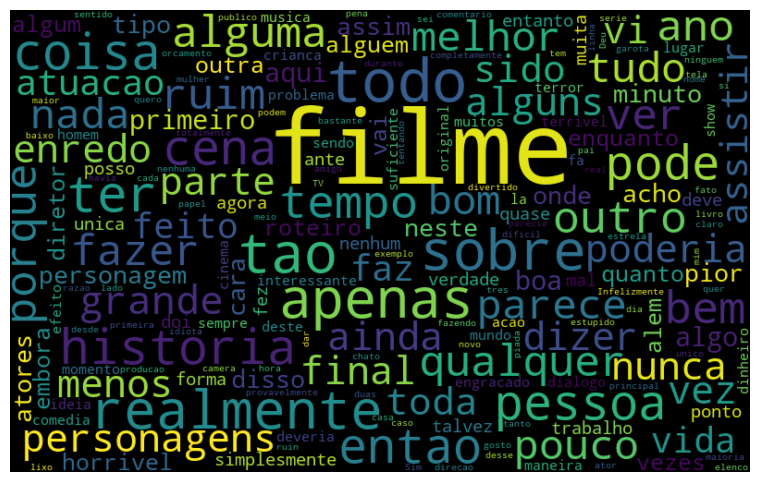

In [57]:
nuvem_de_palavras(resenha, 'tratamento_3', 'sentiment', 'neg')

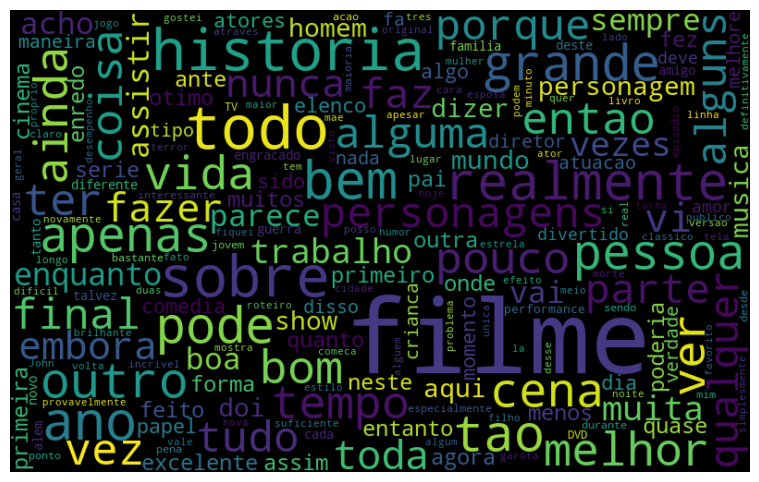

In [58]:
nuvem_de_palavras(resenha, 'tratamento_3', 'sentiment', 'pos')

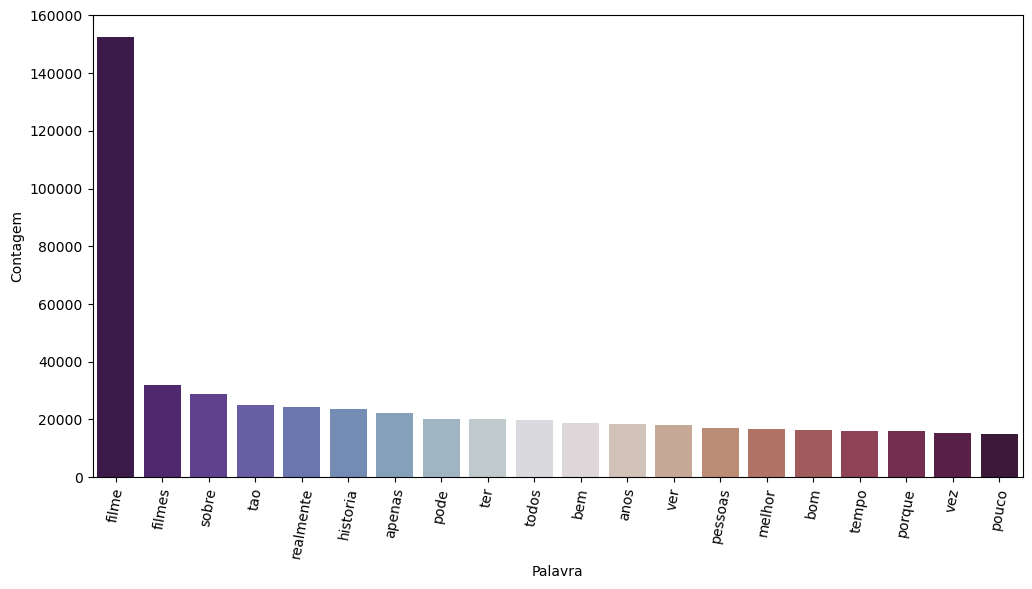

In [59]:
grafico_de_barras(resenha, 'tratamento_3', 20)

### Tratamento 4 - normalização: todas as palavras em letra minúscula

In [60]:
resenha['tratamento_4'] = resenha.tratamento_3.str.lower()

In [61]:
print(resenha['tratamento_4'][0], end='\n\n')
print(resenha['text_pt'][0])

  vez  sr costner arrumou  filme    tempo    necessario alem  terriveis sequencias  resgate  mar  quais   poucas  simplesmente   importei  nenhum  personagens  maioria    fantasmas  armario   personagem costers  realizado logo  inicio   esquecido    tarde     importava  personagem    deveriamos  importar   arrogante  superconfiante ashton kutcher  problema    sai   garoto  pensa   melhor   qualquer outra pessoa   redor   mostra sinais   armario desordenado  unico obstaculo parece  vencendo costner finalmente   bem alem  meio  caminho costner  conta sobre  fantasmas  kutchers  informados    kutcher  levado    melhor  pressentimentos  pressagios anteriores nenhuma magica aqui  tudo   podia fazer   desligar  hora

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personage

In [62]:
classificar_texto(resenha, 'tratamento_4', 'classificacao')

0.6873433077234129

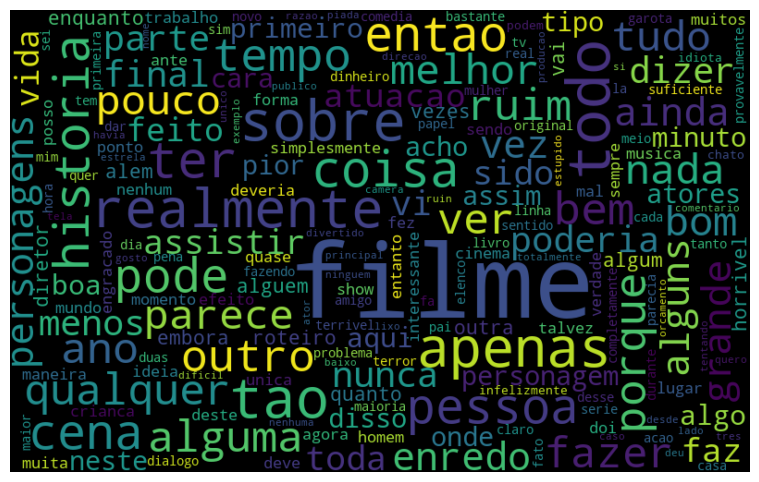

In [63]:
nuvem_de_palavras(resenha, 'tratamento_4', 'sentiment', 'neg')

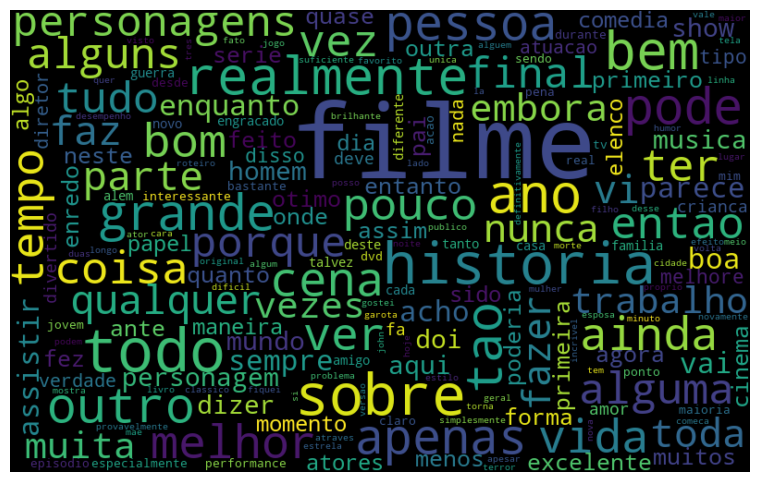

In [64]:
nuvem_de_palavras(resenha, 'tratamento_4', 'sentiment', 'pos')

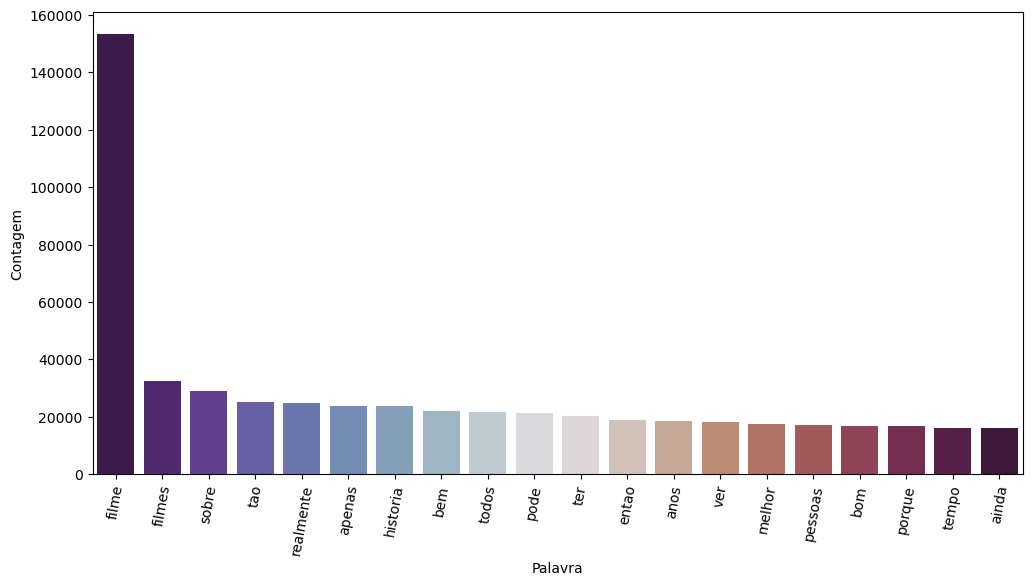

In [65]:
grafico_de_barras(resenha, 'tratamento_4', 20)

### Tratamento 5 - tomando apenas os radicais das palavras

In [66]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('filme')

'film'

In [67]:
resenha['tratamento_5'] = resenha.tratamento_4.str.split().apply(lambda x: [stemmer.stem(y) for y in x]).str.join(' ')

In [68]:
classificar_texto(resenha, 'tratamento_5', 'classificacao')

0.6949454104326729

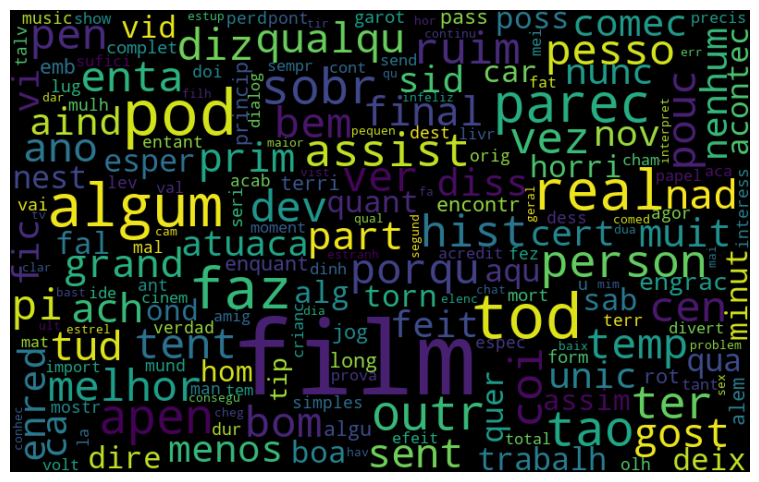

In [69]:
nuvem_de_palavras(resenha, 'tratamento_5', 'sentiment', 'neg')

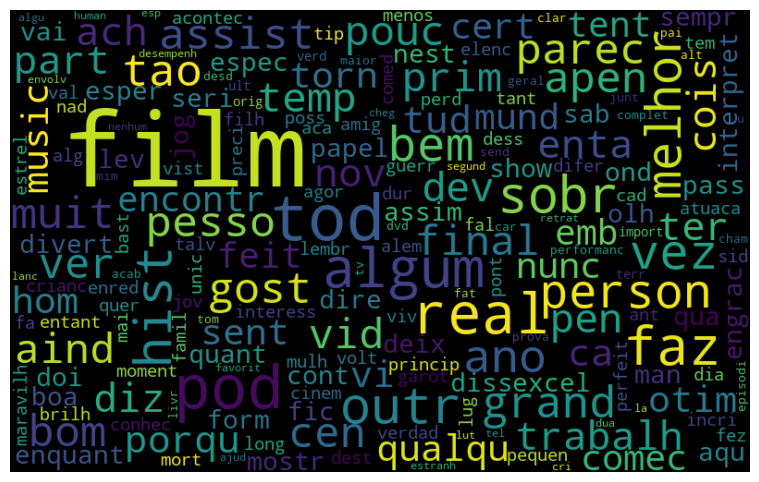

In [70]:
nuvem_de_palavras(resenha, 'tratamento_5', 'sentiment', 'pos')

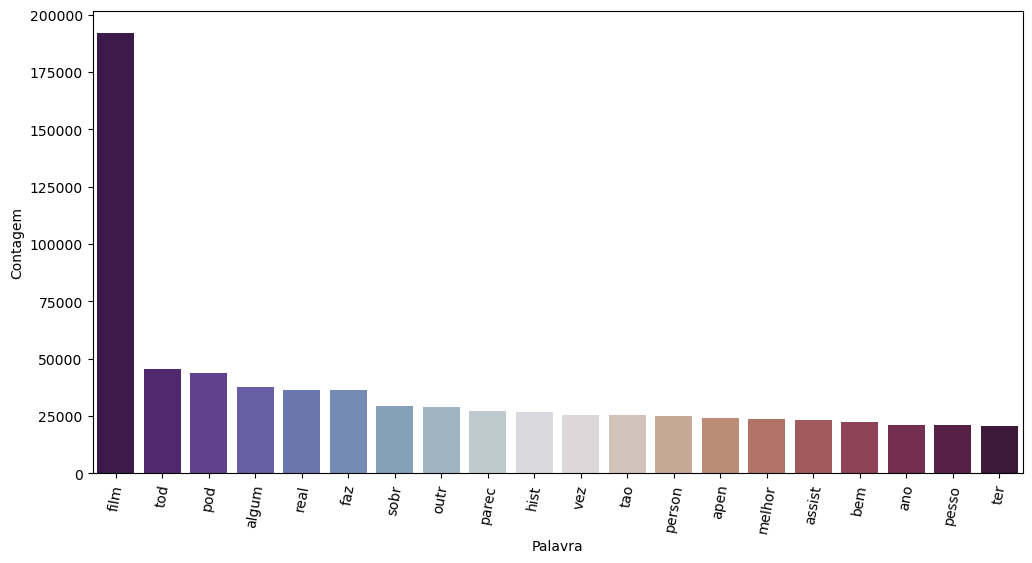

In [71]:
grafico_de_barras(resenha, 'tratamento_5', 20)

## Construindo o dataset mas dando peso às palavras

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [74]:
tfidf_bruto = tfidf.fit_transform(resenha.text_pt)
x_train, x_test, y_train, y_test = train_test_split(tfidf_bruto, resenha.classificacao, random_state=42)

regressao_logistica.fit(x_train, y_train)
acc_tfidf_bruto = regressao_logistica.score(x_test, y_test)
acc_tfidf_bruto

0.6600889607763849

In [75]:
tfidf_tratados = tfidf.fit_transform(resenha.tratamento_5)
x_train, x_test, y_train, y_test = train_test_split(tfidf_tratados, resenha.classificacao, random_state=42)

regressao_logistica.fit(x_train, y_train)
acc_tfidf_tratados = regressao_logistica.score(x_test, y_test)
acc_tfidf_tratados

0.6965628790942175

## Adicionando bigramas

In [76]:
from nltk import ngrams

In [77]:
frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, n=2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [78]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha.tratamento_5)
x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, resenha.classificacao, random_state=42)

regressao_logistica.fit(x_train, y_train)
acc_tfidf = regressao_logistica.score(x_test, y_test)
acc_tfidf

0.8854832187626365

In [138]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(resenha.tratamento_5)
x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, resenha.classificacao, random_state=42)

regressao_logistica.fit(x_train, y_train)
acc_tfidf_ngrams = regressao_logistica.score(x_test, y_test)
acc_tfidf_ngrams

0.8864536999595632

In [139]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names_out()
)

In [140]:
pesos.nsmallest(50, 0)

0
ruim       -11.818106
pi         -11.491501
horri       -9.745369
terri       -8.421577
nad         -7.576522
chat        -7.513792
parec       -6.926429
nenhum      -6.396499
tent        -5.958794
mal         -5.673392
pi film     -5.590269
estup       -5.495578
lix         -5.488085
ridicul     -5.242628
rot         -5.204637
minut       -5.170501
infeliz     -5.157562
irrit       -5.118442
menos       -4.946752
pobr        -4.652444
idiot       -4.206099
desperdici  -4.202542
dinh        -4.156911
apen        -4.026899
decepcion   -3.972594
enred       -3.918733
salv        -3.917381
desperdic   -3.865524
barat       -3.859323
supost      -3.762101
decepca     -3.709936
bagunc      -3.674885
desculp     -3.662848
previsi     -3.645129
sid         -3.616804
porc        -3.615817
frac        -3.610486
clich       -3.587080
entedi      -3.531502
ter         -3.472593
tao ruim    -3.464913
evit        -3.357800
perd temp   -3.287885
simples     -3.285277
unic        -3.232022
ide         -3.190884
tedi        -3.169132
algu        -3.134194
film ruim   -3.061770
ma          -3.005526

In [141]:
pesos.nlargest(50, 0)

0
otim         9.901010
excel        9.013437
perfeit      6.942054
maravilh     6.290599
favorit      5.907316
incri        5.797501
divert       5.393369
brilh        4.897032
ador         4.622731
hoj          4.514455
agrada       4.208513
am           4.172250
definitiv    4.164062
recom        4.112969
vid          4.000486
aind         3.984453
hilari       3.948057
melhor film  3.854120
gost         3.833245
surpreend    3.817120
sempr        3.744380
dvd          3.695143
bom          3.675570
class        3.643110
impression   3.540209
melhor       3.474625
fort         3.465044
performanc   3.447003
lind         3.443113
difer        3.440434
fantas       3.364542
bem          3.337062
bem feit     3.333512
espec        3.305388
soberb       3.303742
comov        3.284833
grand        3.278593
ame          3.193712
muit         3.148199
prim vez     3.043768
human        2.970256
mant         2.957519
trabalh      2.949683
maravilhos   2.869873
toc          2.836821
apreci       2.830607
dev ver      2.822341
vai          2.805773
coraca       2.791997
bel          2.780661